# Linear differential equations

MAT332, Fall 2020, Yury Kudryashov, Week 2, Lecture 1

In [1]:
from sympy import *
init_printing()

## Dimension 1

Consider the equation $\dot x=ax$, where $a$ is a real number and $x$ is an unknown funnction $\mathbb R\to\mathbb R$. It is easy to see that $x(t)=e^{at}$ is a solution of this equation:
$$
\frac{d}{dt}e^{at}=e^{at}\cdot \frac{d(at)}{dt}=ae^{at}.
$$
Next, $x(t)=ce^{at}$ is a solution of this equation for any $c$. Are there any other solutions? The answer is NO: for any solution we have $x(t)=x(0)e^{at}$. Indeed, if $x$ is a solution, then
$$
\frac{d}{dt}\left(x(t)e^{-at}\right)=\dot x(t)e^{-at}+x(t)\cdot \frac{d}{dt}e^{-at}=ax(t)e^{-at}-ax(t)e^{-at}=0,
$$
hence $x(t)e^{-at}$ is a constant function, $x(t)e^{-at}=x(0)e^{-a\cdot 0}=x(0)$, thus $x(t)=x(0)e^{at}$.

We can also ask `Python` to verify that $x(t)=e^{at}$ is a solution.

In [2]:
var('a t c')
x = c * exp(a * t)
simplify(x.diff(t) - a * x)

### Practice problems

1. Find all solutions of the equation $\dot x=2x$.
2. Find the solution of $\dot x=-x$ such that $x(1)=e$.

## Dimension 2

Now consider an equation of the form
$$
\dot x=Ax,
$$
where $A$ is a $(2\times 2)$-matrix and $x\colon\mathbb R\to\mathbb R^2$, $x(t)=\begin{pmatrix}x_1(t)\\x_2(t)\end{pmatrix}$ is an unknown vector-valued function.

Before discussing the general case, consider a few special cases.

### Diagonal matrix $A=\begin{pmatrix}\lambda&0\\0&\mu\end{pmatrix}$

In this case the system takes the form
$$
\begin{align}
\dot x_1&=\lambda x_1;\\
\dot x_2&=\mu x_2,
\end{align}
$$
and we can solve these two equations independently: $x_1(t)=x_1(0)e^{\lambda t}$, $x_2(t)=x_2(0)e^{\mu t}$. We can also write the answer as
$$
x(t)=\begin{pmatrix}e^{\lambda t}&0\\0&e^{\mu t}\end{pmatrix}x(0).
$$

Again, we can ask `Python` to double check our computation. 

In [3]:
var('λ μ t c0 c1')
c = Matrix([c0, c1])
A = Matrix([[λ, 0], [0, μ]])
M = Matrix([[exp(λ * t), 0], [0, exp(μ * t)]])
x = M * c
display(A) # display matrix `A`
display(M) # display the fundamental matrix of solutions
display(x) # display the solution `x`
display(x.diff(t) - A * x) # verify that `x` is a solution
display(x.subs(t, 0)) # verify that `x(0)=(c0, c1)`

⎡λ  0⎤
⎢    ⎥
⎣0  μ⎦

⎡ t⋅λ      ⎤
⎢ℯ      0  ⎥
⎢          ⎥
⎢       t⋅μ⎥
⎣ 0    ℯ   ⎦

⎡    t⋅λ⎤
⎢c₀⋅ℯ   ⎥
⎢       ⎥
⎢    t⋅μ⎥
⎣c₁⋅ℯ   ⎦

### Jordan cell $A=\begin{pmatrix}\lambda&1\\0&\lambda\end{pmatrix}$

In this case the system takes the form
$$
\begin{align}
\dot x_1&=\lambda x_1+x_2;\\
\dot x_2&=\lambda x_2.
\end{align}
$$
While these equations are no longer independent, we can solve the second one, then substitute the solution in the first one. Then we get $x_2(t)=x_2(0)e^{\lambda t}$, $\dot x_1=\lambda x_1+x_2(0)e^{\lambda t}$. One can verify that $x_1(t)=x_2(0)te^{\lambda t}+x_1(0)e^{\lambda t}$ is a solution of this differential equation. As we will see later, this is the only solution of this equation with given $x_1(0)$. Again, we can write down the answer as
$$
x(t)=\begin{pmatrix}e^{\lambda t}&te^{\lambda t}\\0&e^{\lambda t}\end{pmatrix}x(0)
$$
and let `Python` verify the answer.

In [4]:
A = Matrix([[λ, 1], [0, λ]])
M = Matrix([[exp(λ * t), t * exp(λ * t)], [0, exp(λ * t)]])
x = M * c
display(A) # display matrix `A`
display(M) # display the fundamental matrix of solutions
display(x) # display the solution `x`
display(x.diff(t) - A * x) # verify that `x` is a solution
display(simplify(x.diff(t) - A * x)) # verify that `x` is a solution
display(x.subs(t, 0)) # verify that `x(0)=(c0, c1)`

⎡λ  1⎤
⎢    ⎥
⎣0  λ⎦

⎡ t⋅λ     t⋅λ⎤
⎢ℯ     t⋅ℯ   ⎥
⎢            ⎥
⎢        t⋅λ ⎥
⎣ 0     ℯ    ⎦

⎡    t⋅λ         t⋅λ⎤
⎢c₀⋅ℯ    + c₁⋅t⋅ℯ   ⎥
⎢                   ⎥
⎢          t⋅λ      ⎥
⎣      c₁⋅ℯ         ⎦

⎡      t⋅λ           t⋅λ     ⎛    t⋅λ         t⋅λ⎞⎤
⎢c₀⋅λ⋅ℯ    + c₁⋅t⋅λ⋅ℯ    - λ⋅⎝c₀⋅ℯ    + c₁⋅t⋅ℯ   ⎠⎥
⎢                                                 ⎥
⎣                        0                        ⎦

### Complex eigenvalues $A=\begin{pmatrix}a&-b\\b&a\end{pmatrix}$

In this case it is hard to guess the solution (at least without using complex exponentials, see the textbook) but it is easy to verify that
$$
\begin{align}
x_1(t)&=x_1(0)e^{at}\cos(bt)-x_2(0)e^{at}\sin(bt),\\
x_2(t)&=x_1(0)e^{at}\sin(bt)+x_2(0)e^{at}\cos(bt)
\end{align}
$$
is a solution.

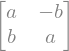

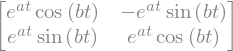

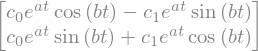

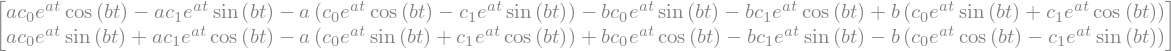

In [5]:
var('a b')
A = Matrix([[a, -b], [b, a]])
M = exp(a * t) * Matrix([[cos(b * t), -sin(b * t)], [sin(b * t), cos(b * t)]])
x = M * c
display(A) # display matrix `A`
display(M) # display the fundamental matrix of solutions
display(x) # display the solution `x`
display(x.diff(t) - A * x) # verify that `x` is a solution
display(simplify(x.diff(t) - A * x)) # verify that `x` is a solution
display(x.subs(t, 0)) # verify that `x(0)=(c0, c1)`

### Change of basis (a.k.a. conjugate matrix)

[Jordan normal form theorem](https://en.wikipedia.org/wiki/Jordan_normal_form) implies that any $(2\times 2)$-matrix is conjugate to one of the matrices we discussed above. Thus in order to solve $\dot x=Ax$ with any matrix $A$ it suffices to learn how to deal with each of these cases (done) and how to solve $\dot x=CAC^{-1}x$ provided that we know the solutions of $\dot y=Ay$. The answer is simple: for each solution $y(t)$ of $\dot y=Ay$, the function $x(t)=Cy(t)$ is a solution of $\dot x=CAC^{-1}x$.

Indeed,
$$
\frac{d}{dt}(Cy(t))=C\dot y(t)=CAy(t)=(CAC^{-1})Cy(t).
$$

## Exponential of a matrix

Given an $(n\times n)$-matrix $A$, one can define $\exp(A)=e^{A}$ as
$$e^{A}=\sum_{n=0}^{\infty}\frac{1}{n!}A^n=I+A+\frac{A^2}{2!}+\dots$$,
where $n!=1\times\dots\times n$ is the factorial of $n$. Then $x(t)=e^{At}x(0)$ is a solution of $\dot x=Ax$. Indeed,
$$\frac{d}{dt}(e^{At})=\frac{d}{dt}\left(I+tA+\frac{t^2}{2!}A^2+\frac{t^3}{3!}A^3+\dots+\frac{t^n}{n!}A^n+\dots\right)=0+A+tA^2+\frac{t^2}{2!}A^3+\dots+\frac{t^{n-1}}{(n-1)!}A^n+\dots=Ae^{At},$$
hence
$$\frac{d}{dt}(e^{At}x(0))=Ae^{At}x(0).$$

Note that computing $e^{At}$ is not a trivial task, so this formula gives us another way to think about the formulas for solutions we discussed above, not a simpler way to compute these solutions.